In [58]:
import random

roll = [random.randint(1,6) for _ in range(10)]
roll.sort()
roll

[1, 1, 1, 1, 1, 2, 3, 5, 5, 6]

In [59]:
from collections import Counter
def score(roll):
    counts = Counter(roll)
    total = 0
    triple_score = {k:v for (k,v) in zip(range(1,7),[1000]+[i*100 for i in range(2,7)])}
    for triple in triple_score.keys():
        while counts[triple] >= 3:
            total += triple_score[triple]
            counts[triple] -= 3
    
    total += counts[1]*100
    total += counts[5]*50
    
    return total

In [60]:
score(roll)

1300

In [61]:
avg_total = 0.0
avg_count = int(1e5)
for _ in range(avg_count):
    roll = [random.randint(1,6) for _ in range(10)]
    avg_total += score(roll)
avg = avg_total/avg_count
avg

828.833

In [62]:
scores = [score([random.randint(1,6) for _ in range(10)]) for _ in range(int(1e6))]

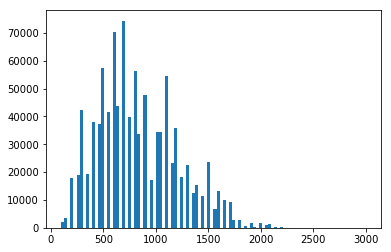

In [63]:
import matplotlib.pyplot as plt
plt.hist(scores,bins=100)
plt.figure(figsize=(20,6))
plt.show()

In [64]:
from __future__ import print_function
score_count = Counter(scores)
sorted_score_count = sorted(score_count, key=score_count.get, reverse=True)
for w in sorted_score_count[0:20]:
    print (w, score_count[w])

700 74356
600 70207
500 57411
800 56474
1100 54525
900 47639
650 43626
300 42358
550 41501
750 39885
400 38140
450 37410
1200 35741
1000 34363
1050 34237
850 33839
1500 23651
1150 23370
1300 22559
350 19488


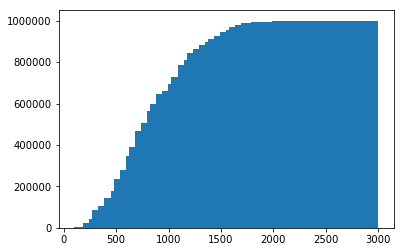

In [65]:
plt.hist(scores,bins=100,cumulative=1)
plt.figure(figsize=(20,6))
plt.show()

In [66]:
sum([1 for s in scores if s >= 1000])/len(scores)

0.33836

In [ ]:
sorted_score_count = sorted(score_count, key=score_count.get, reverse=True)

In [68]:
sorted(score_count.items(), reverse=True)

[(3000, 2),
 (2700, 2),
 (2650, 11),
 (2600, 45),
 (2550, 3),
 (2500, 50),
 (2450, 11),
 (2400, 38),
 (2350, 14),
 (2300, 49),
 (2250, 34),
 (2200, 176),
 (2150, 161),
 (2100, 1395),
 (2050, 1117),
 (2000, 1547),
 (1950, 370),
 (1900, 1847),
 (1850, 607),
 (1800, 2966),
 (1750, 2626),
 (1700, 9111),
 (1650, 10107),
 (1600, 13099),
 (1550, 6877),
 (1500, 23651),
 (1450, 11540),
 (1400, 15500),
 (1350, 12380),
 (1300, 22559),
 (1250, 18229),
 (1200, 35741),
 (1150, 23370),
 (1100, 54525),
 (1050, 34237),
 (1000, 34363),
 (950, 17021),
 (900, 47639),
 (850, 33839),
 (800, 56474),
 (750, 39885),
 (700, 74356),
 (650, 43626),
 (600, 70207),
 (550, 41501),
 (500, 57411),
 (450, 37410),
 (400, 38140),
 (350, 19488),
 (300, 42358),
 (250, 18956),
 (200, 17754),
 (150, 3665),
 (100, 1910)]

In [76]:
def get_roll(n_dice):
    return [random.randint(1,6) for _ in range(n_dice)]
def does_live(roll):
    if 1 in roll or 5 in roll: return True
    counts = Counter(roll)
    for number in counts:
        if counts[number] > 2: return True
    return False

test_rolls = [[1],[2],[3,3,3],[3],[4],[4,4,4,6],[1,2,3]]
[(roll, does_live(roll)) for roll in test_rolls]

[([1], True),
 ([2], False),
 ([3, 3, 3], True),
 ([3], False),
 ([4], False),
 ([4, 4, 4, 6], True),
 ([1, 2, 3], True)]

In [80]:
%%time
prob_live = dict()
for num_dice in range(1,11):
    num_rolls = 100000
    num_lives = 0
    for _ in range(num_rolls):
        roll = get_roll(num_dice)
        if does_live(roll): num_lives += 1
    prob_live[num_dice] = float(num_lives)/num_rolls

for key in sorted(prob_live, key=prob_live.get, reverse=False):
    print('P(live|%s) = %s' % (key,prob_live[key]))

P(live|1) = 0.33192
P(live|2) = 0.55732
P(live|3) = 0.7251
P(live|4) = 0.84173
P(live|5) = 0.92154
P(live|6) = 0.96919
P(live|7) = 0.99123
P(live|8) = 0.99846
P(live|9) = 1.0
P(live|10) = 1.0
CPU times: user 8.34 s, sys: 17.5 ms, total: 8.36 s
Wall time: 8.36 s


In [89]:
%%time
ev = dict()
ev_live = dict()

for num_dice in range(1,11):
    num_rolls = 100000
    avg_total = 0.0
    num_live_rolls = 0
    avg_live_total = 0.0
    for _ in range(num_rolls):
        roll = get_roll(num_dice)
        roll_score = score(roll)
        avg_total += roll_score
        if does_live(roll):
            num_live_rolls += 1
            avg_live_total += roll_score
    avg = avg_total/num_rolls
    ev[num_dice] = avg
    ev_live[num_dice] = avg_live_total/num_live_rolls
    
for key in sorted(ev, key=ev.get, reverse=False):
    print('EV(%s dice) = %0.2f \t EV(%s dice|does_live) = %0.2f \t EV*P(live) = %0.2f' 
          % (key,ev[key],
             key,ev_live[key],
            ev[key]/prob_live[key]))

EV(1 dice) = 24.93 	 EV(1 dice|does_live) = 75.02 	 EV*P(live) = 75.09
EV(2 dice) = 49.74 	 EV(2 dice|does_live) = 89.85 	 EV*P(live) = 89.25
EV(3 dice) = 86.34 	 EV(3 dice|does_live) = 119.65 	 EV*P(live) = 119.08
EV(4 dice) = 141.09 	 EV(4 dice|does_live) = 167.65 	 EV*P(live) = 167.62
EV(5 dice) = 214.67 	 EV(5 dice|does_live) = 232.41 	 EV*P(live) = 232.95
EV(6 dice) = 309.01 	 EV(6 dice|does_live) = 318.67 	 EV*P(live) = 318.83
EV(7 dice) = 419.24 	 EV(7 dice|does_live) = 423.07 	 EV*P(live) = 422.95
EV(8 dice) = 546.05 	 EV(8 dice|does_live) = 547.04 	 EV*P(live) = 546.89
EV(9 dice) = 684.59 	 EV(9 dice|does_live) = 684.59 	 EV*P(live) = 684.59
EV(10 dice) = 828.84 	 EV(10 dice|does_live) = 828.84 	 EV*P(live) = 828.84
CPU times: user 16.2 s, sys: 29.9 ms, total: 16.2 s
Wall time: 16.2 s


In [103]:
current_scores = range(100,3001,100)
dice_left = range(1,11)
for s in current_scores:
    for d in dice_left:
        ev_score = (s + ev_live[d]) * prob_live[d]
        roll_string = 'ROLL!' if ev_score > s else 'stop'
        print('current_score: %d, dice_left: %d, EV of continuing: %0.2f - %s' % (s,d,ev_score,roll_string))
        
    print()

current_score: 100, dice_left: 1, EV of continuing: 58.09 - stop
current_score: 100, dice_left: 2, EV of continuing: 105.81 - ROLL!
current_score: 100, dice_left: 3, EV of continuing: 159.27 - ROLL!
current_score: 100, dice_left: 4, EV of continuing: 225.29 - ROLL!
current_score: 100, dice_left: 5, EV of continuing: 306.33 - ROLL!
current_score: 100, dice_left: 6, EV of continuing: 405.77 - ROLL!
current_score: 100, dice_left: 7, EV of continuing: 518.48 - ROLL!
current_score: 100, dice_left: 8, EV of continuing: 646.04 - ROLL!
current_score: 100, dice_left: 9, EV of continuing: 784.59 - ROLL!
current_score: 100, dice_left: 10, EV of continuing: 928.84 - ROLL!

current_score: 200, dice_left: 1, EV of continuing: 91.28 - stop
current_score: 200, dice_left: 2, EV of continuing: 161.54 - stop
current_score: 200, dice_left: 3, EV of continuing: 231.78 - ROLL!
current_score: 200, dice_left: 4, EV of continuing: 309.47 - ROLL!
current_score: 200, dice_left: 5, EV of continuing: 398.49 - ROLL